## 24.05.02(목)
9주차 실습

- Logistic Regression을 이용한 타이타닉 생존자 예측
- 타이타닉은 1910년 당시 최대의 여객선
- 영국에서 미국으로 가던 국제선이라 여권 정보가 데이터로 남아있음 (이름, 직업, 나이, 성별, 가족관계 등)

In [3]:
# 런타임에 titanic.csv 파일을 업로드하고 read_csv로 불러오기
import pandas as pd

titanic = pd.read_csv('./titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


컬럼의 의미
- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수(수평적인 가족관계)
- parch : 부모 혹은 자녀의 수
- fare : 지불한 요금
- boat : 탈출을 했다면 탑승한 보트의 번호

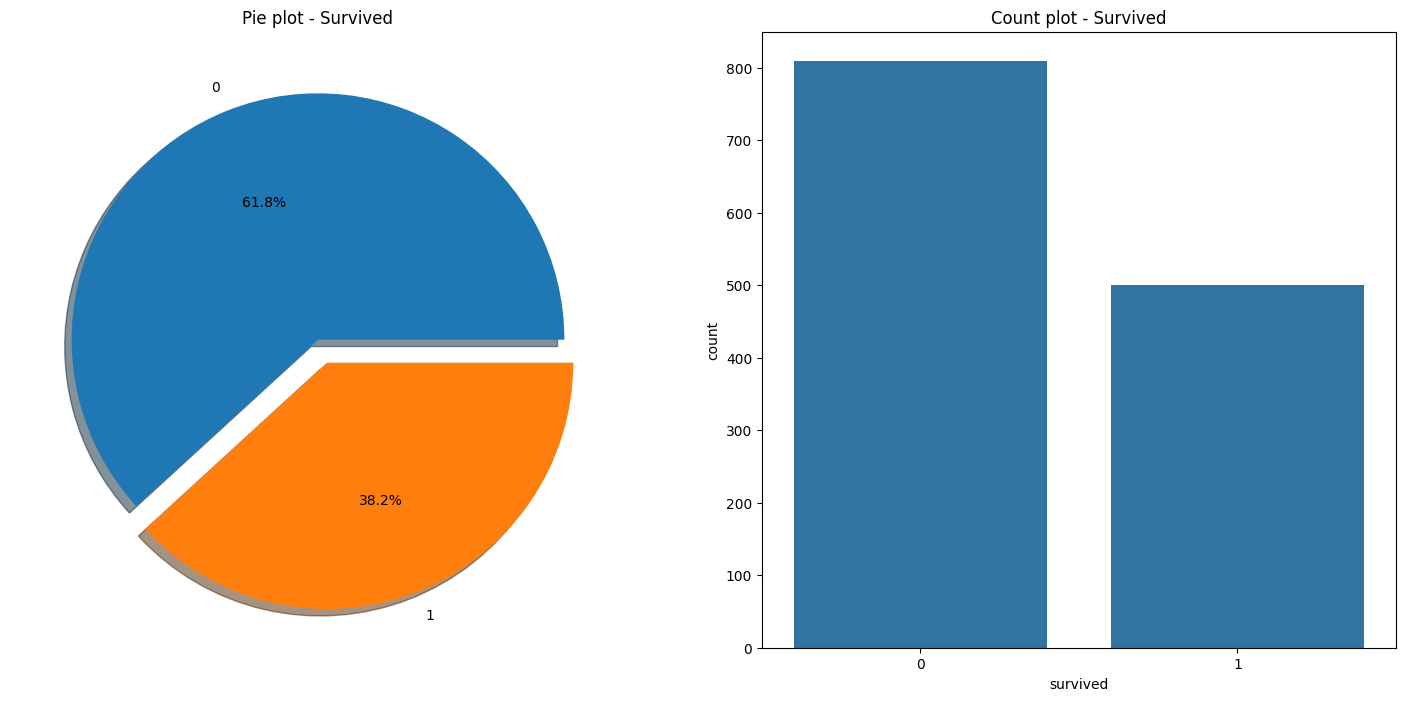

In [13]:
# 생존 상황
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 그래프 2개로 보기 위해 1행 2열로 나누고(ax[0], ax[1]) 크기 지정
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# survived 항목에서 생존자 수를 세고 파이차트로 plot
titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%',
                                            ax=ax[0],
                                            shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(data=titanic, x='survived', ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show() # 생존률 38.2%

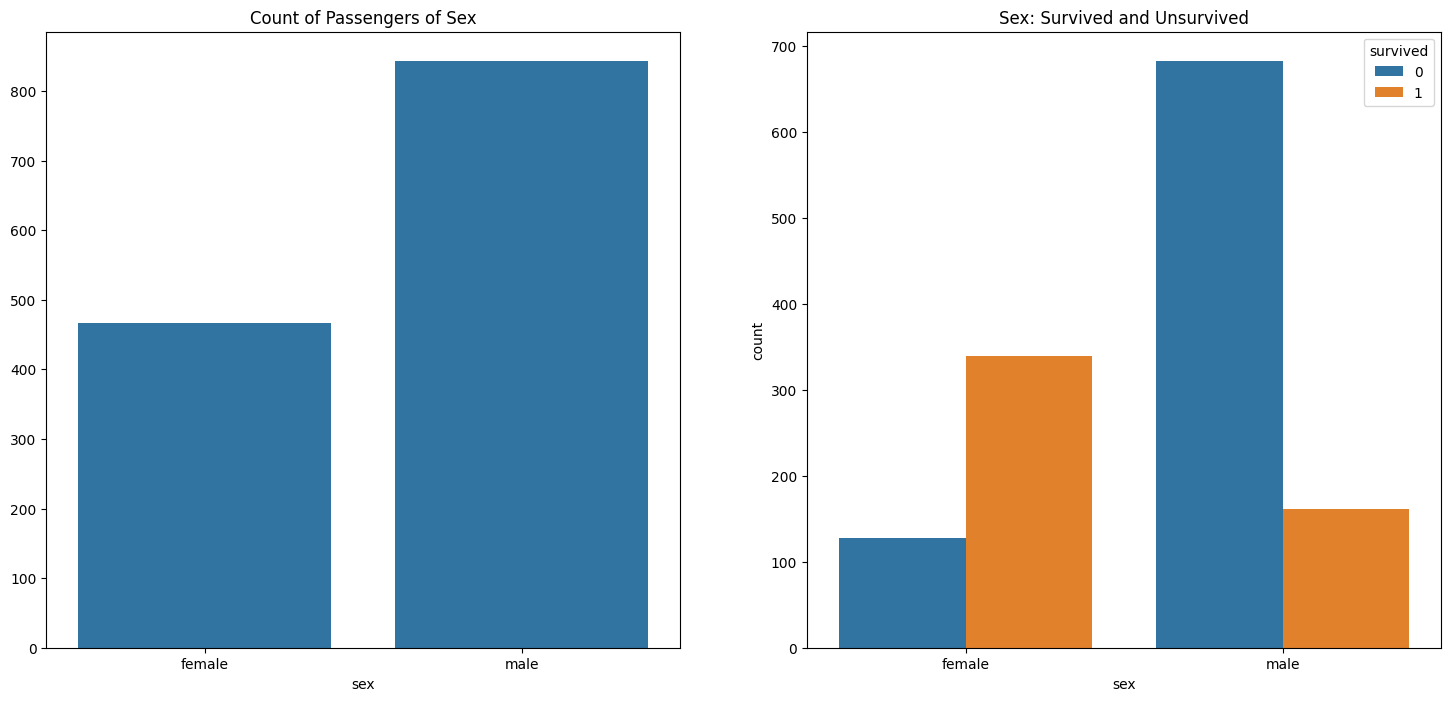

In [14]:
# 성별에 따른 생존률
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=titanic, x='sex', ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(data=titanic, x='sex', hue='survived', ax=ax[1])
ax[1].set_title('Sex: Survived and Unsurvived')

plt.show() # 남성의 생존률이 더 낮다

In [15]:
# 경제력(선실 등급) 대비 생존률 (생존: 1)
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

# 1등실의 생존 가능성이 아주 높음

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


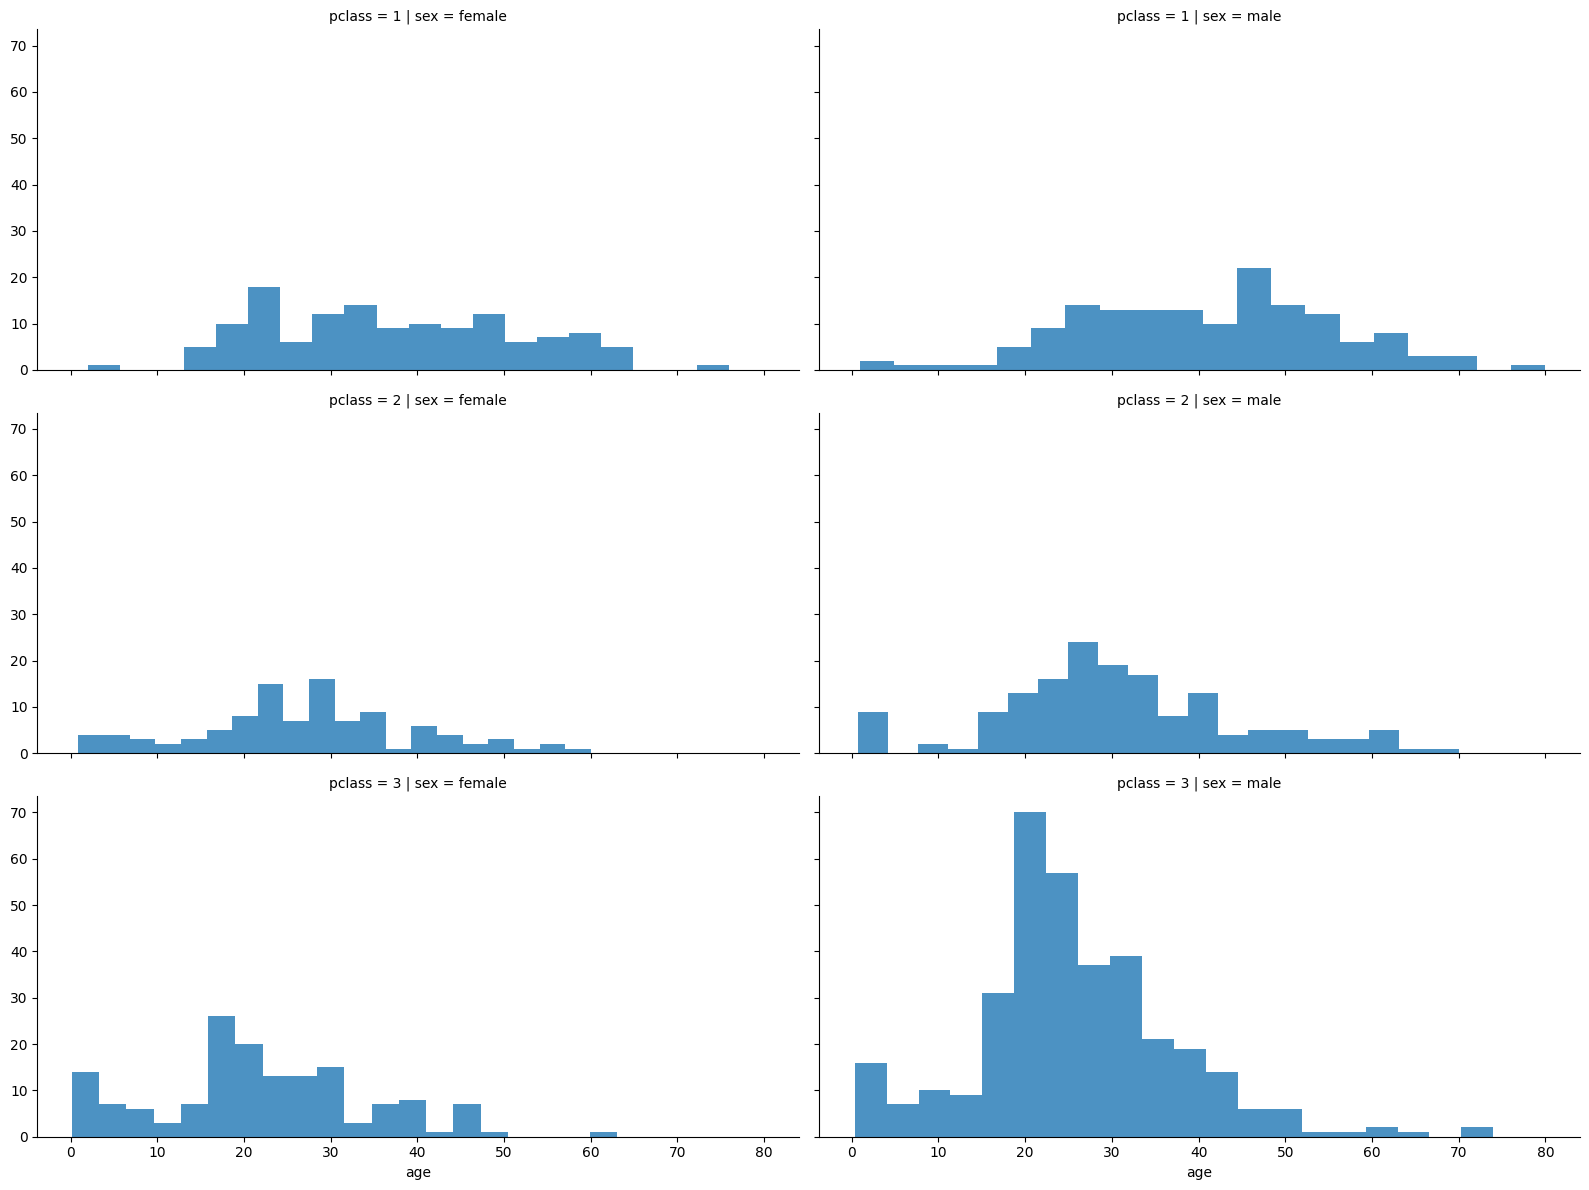

In [17]:
# 선실 등급별 성별 현황 (sns.FacetGrid)
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)

# 3등실에는 20대 남성이 많았음

In [18]:
# 나이별 승객 현황
import plotly.express as px

fig = px.histogram(titanic, x="age")
fig.show()

# 아이들과 20~30대가 많음

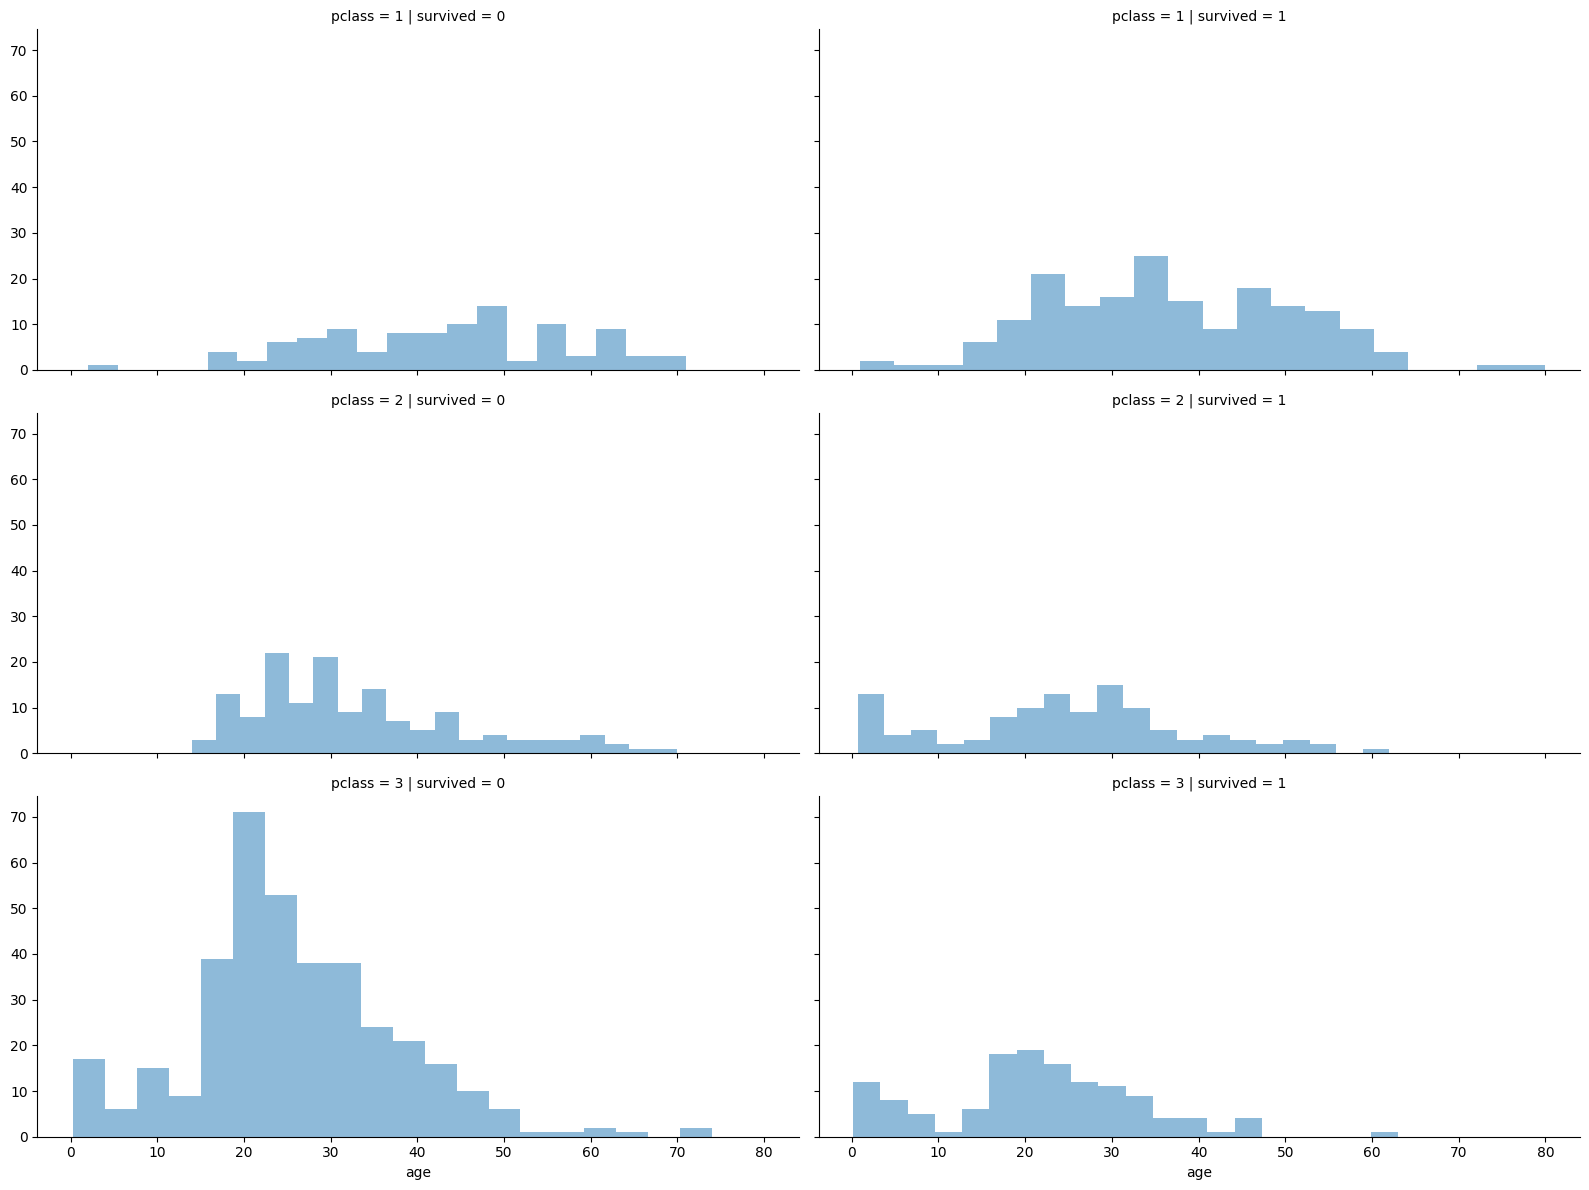

In [20]:
# 등실별 생존률을 연령대별로 관찰
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)

# 선실 등급이 높으면 생존률이 높다

In [21]:
# 나이를 5단계로 정리하기
titanic['age_cat'] = pd.cut(titanic['age'],
                            bins=[0, 7, 15, 30, 60, 100],
                            include_lowest=True,
                            labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


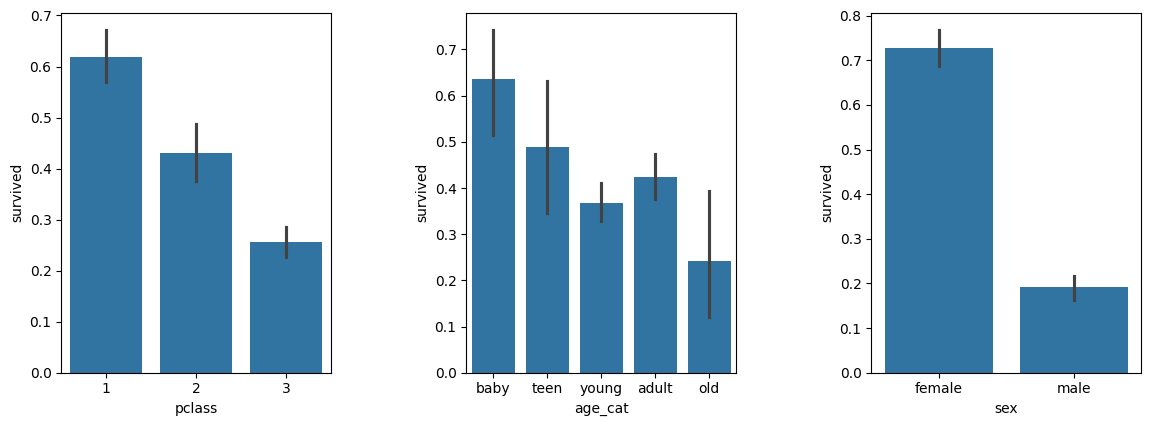

In [23]:
# 나이, 성별, 등급별 생존자 수를 한 번에 파악할 수 있을까?
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.barplot(data=titanic, x='pclass', y='survived')

plt.subplot(132)
sns.barplot(data=titanic, x='age_cat', y='survived')

plt.subplot(133)
sns.barplot(data=titanic, x='sex', y='survived')

plt.subplots_adjust(top=1, bottom=0.1,
                    left=0.1, right=1,
                    hspace=0.5, wspace=0.5)
# 1등실이고, 어리고, 여성일수록 생존하기 유리했을까?

당시에는 선장이 배를 선택했음
선장 : E. J. 스미스

- 선원과 승객들에게 인기가 많아서 어떤 승객들은 스미스 선장이 책임지는 배만 탑승하기도 함
- 은퇴가 예정되어 있었는데 선박 회사의 부탁을 거절하지 못 하고 마지막 운항을 하기로 했다고 함
- 배의 침몰 직전까지도 승객의 대피와 구조 요청을 지휘하다가 배와 함께 운명을 했다고 함

타이타닉과 빙산의 충돌
- 육안으로 발견할 정도면 이미 늦은 것

타이타닉의 탈출 원칙
- 통신사가 1인 근무로 인한 피로 누적으로 구조 신호를 못 받았다고 함
- 2등 항해사 라이틀러는 선장에게 여자와 어린이를 먼저 태울 것을 건의했다고 함

In [24]:
# 간단히 구조 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.8+ KB


In [25]:
# 머신러닝을 위해 해당 컬럼을 숫자로 변경 (LabelEncoder)
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,0


In [31]:
# 데이터 중에 빈 곳(null)이 있는 것만 출력해서 확인
titanic.isnull().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
age_cat       True
gender       False
dtype: bool

In [32]:
# 결과가 없는 부분은 제거
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 131.9+ KB


<Axes: >

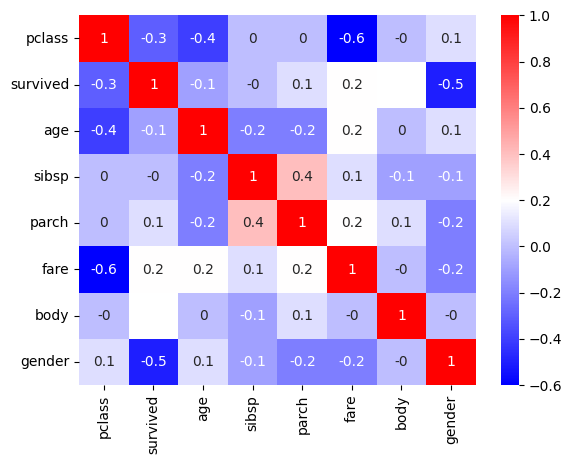

In [35]:
# 상관관계 (survived 행 주목, 많은 영향을 주는 건 큰 숫자가 아니라 절댓값 큰 것)
correlation_matrix = titanic.corr(numeric_only = True).round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [37]:
# 특성을 먼저 선택하고, 데이터를 나누자
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=13)

In [38]:
# DecisionTree 적용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


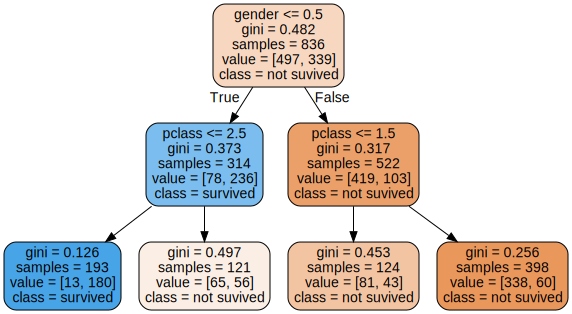

In [39]:
# DecisionTree에서 중요한 특성 확인
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X.columns,
                       class_names=['not suvived', 'survived'],
                       rounded=True, filled=True))
# depth = 2에서는 성별과 선실 등급이 중요하게 작용함

In [40]:
# LogisticRegression 적용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.7511961722488039


In [42]:
# 다시 데이터를 StandardScaler를 적용하고 다시 학습
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = \
train_test_split(X_ss, y, test_size=0.2, random_state=13)

lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [44]:
# 여전히 test data의 accuracy가 개선되지 않음
pred = lr.predict(X_train)
print("Train Acc : ", accuracy_score(y_train, pred))

pred = lr.predict(X_test)
print("Train Acc : ", accuracy_score(y_test, pred))
# 특성을 정규화한다고 항상 성과가 잘 나오는 건 아님

Train Acc :  0.7930622009569378
Train Acc :  0.7559808612440191


In [45]:
# 그런데 디카프리오의 생존율은?
# 디카프리오를 특정해보자(선실 등급, 나이, 형제 수, 직계가족, 요금, 성별)
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
dicaprio_ss = SS.transform(dicaprio)
print('Dicaprio : ', lr.predict_proba(dicaprio_ss))

Dicaprio :  [[0.8574148 0.1425852]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [46]:
# 그럼 윈슬릿은?
winslet = np.array([[1, 16, 1, 1, 100, 0]])
winslet_ss = SS.transform(winslet)
print('Winslet : ', lr.predict_proba(winslet_ss)[0, 1])

Winslet :  0.9396528131031697


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

